<a href="https://colab.research.google.com/github/ylonaSAINTEROSE/test/blob/main/ML_tp1_groupe_Jeremy_Juliette_Ylona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc

from sklearn.neighbors import KNeighborsClassifier

from google.colab import files

In [ ]:
files.upload()


Saving stress_classification.csv to stress_classification.csv


{'stress_classification.csv': b'snoring_range;respiration_rate;body_temperature;limb_movement_rate;blood_oxygen_levels;rapid_eye_movement;hour_of_sleep;heart_rate;stress_level\r\n93.8;25.68;91.84;16.6;89.84;99.6;1.84;74.2;3\r\n91.64;25.104;91.552;15.88;89.552;98.88;1.552;72.76;3\r\n60;20;96;10;95;85;7;60;1\r\n85.76;23.536;90.768;13.92;88.768;96.92;0.768;68.84;3\r\n48.12;17.248;97.872;6.496;96.248;72.48;8.248;53.12;0\r\n56.88;19.376;95.376;9.376;94.064;83.44;6.376;58.44;1\r\n47;16.8;97.2;5.6;95.8;68;7.8;52;0\r\n50;18;99;8;97;80;9;55;0\r\n45.28;16.112;96.168;4.224;95.112;61.12;7.112;50.28;0\r\n55.52;19.104;95.104;9.104;93.656;82.76;6.104;57.76;1\r\n73.44;21.344;93.344;11.344;91.344;91.72;4.016;63.36;2\r\n59.28;19.856;95.856;9.856;94.784;84.64;6.856;59.64;1\r\n48.6;17.44;98.16;6.88;96.44;74.4;8.44;53.6;0\r\n96.288;26.288;85.36;17.144;82.432;100.36;0;75.72;4\r\n87.8;24.08;91.04;14.6;89.04;97.6;1.04;70.2;3\r\n52.32;18.464;94.464;8.464;92.696;81.16;5.464;56.16;1\r\n52.64;18.528;94.528;8.528;

In [ ]:
data = pd.read_csv('stress_classification.csv', delimiter=';')

In [ ]:
data.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
"check null values"
b = data.isnull().sum()
print(b)

snoring_range          0
respiration_rate       0
body_temperature       0
limb_movement_rate     0
blood_oxygen_levels    0
rapid_eye_movement     0
hour_of_sleep          0
heart_rate             0
stress_level           0
dtype: int64


In [ ]:
"check missing values"
b = data.isnull().sum().sum()
print(b)

0


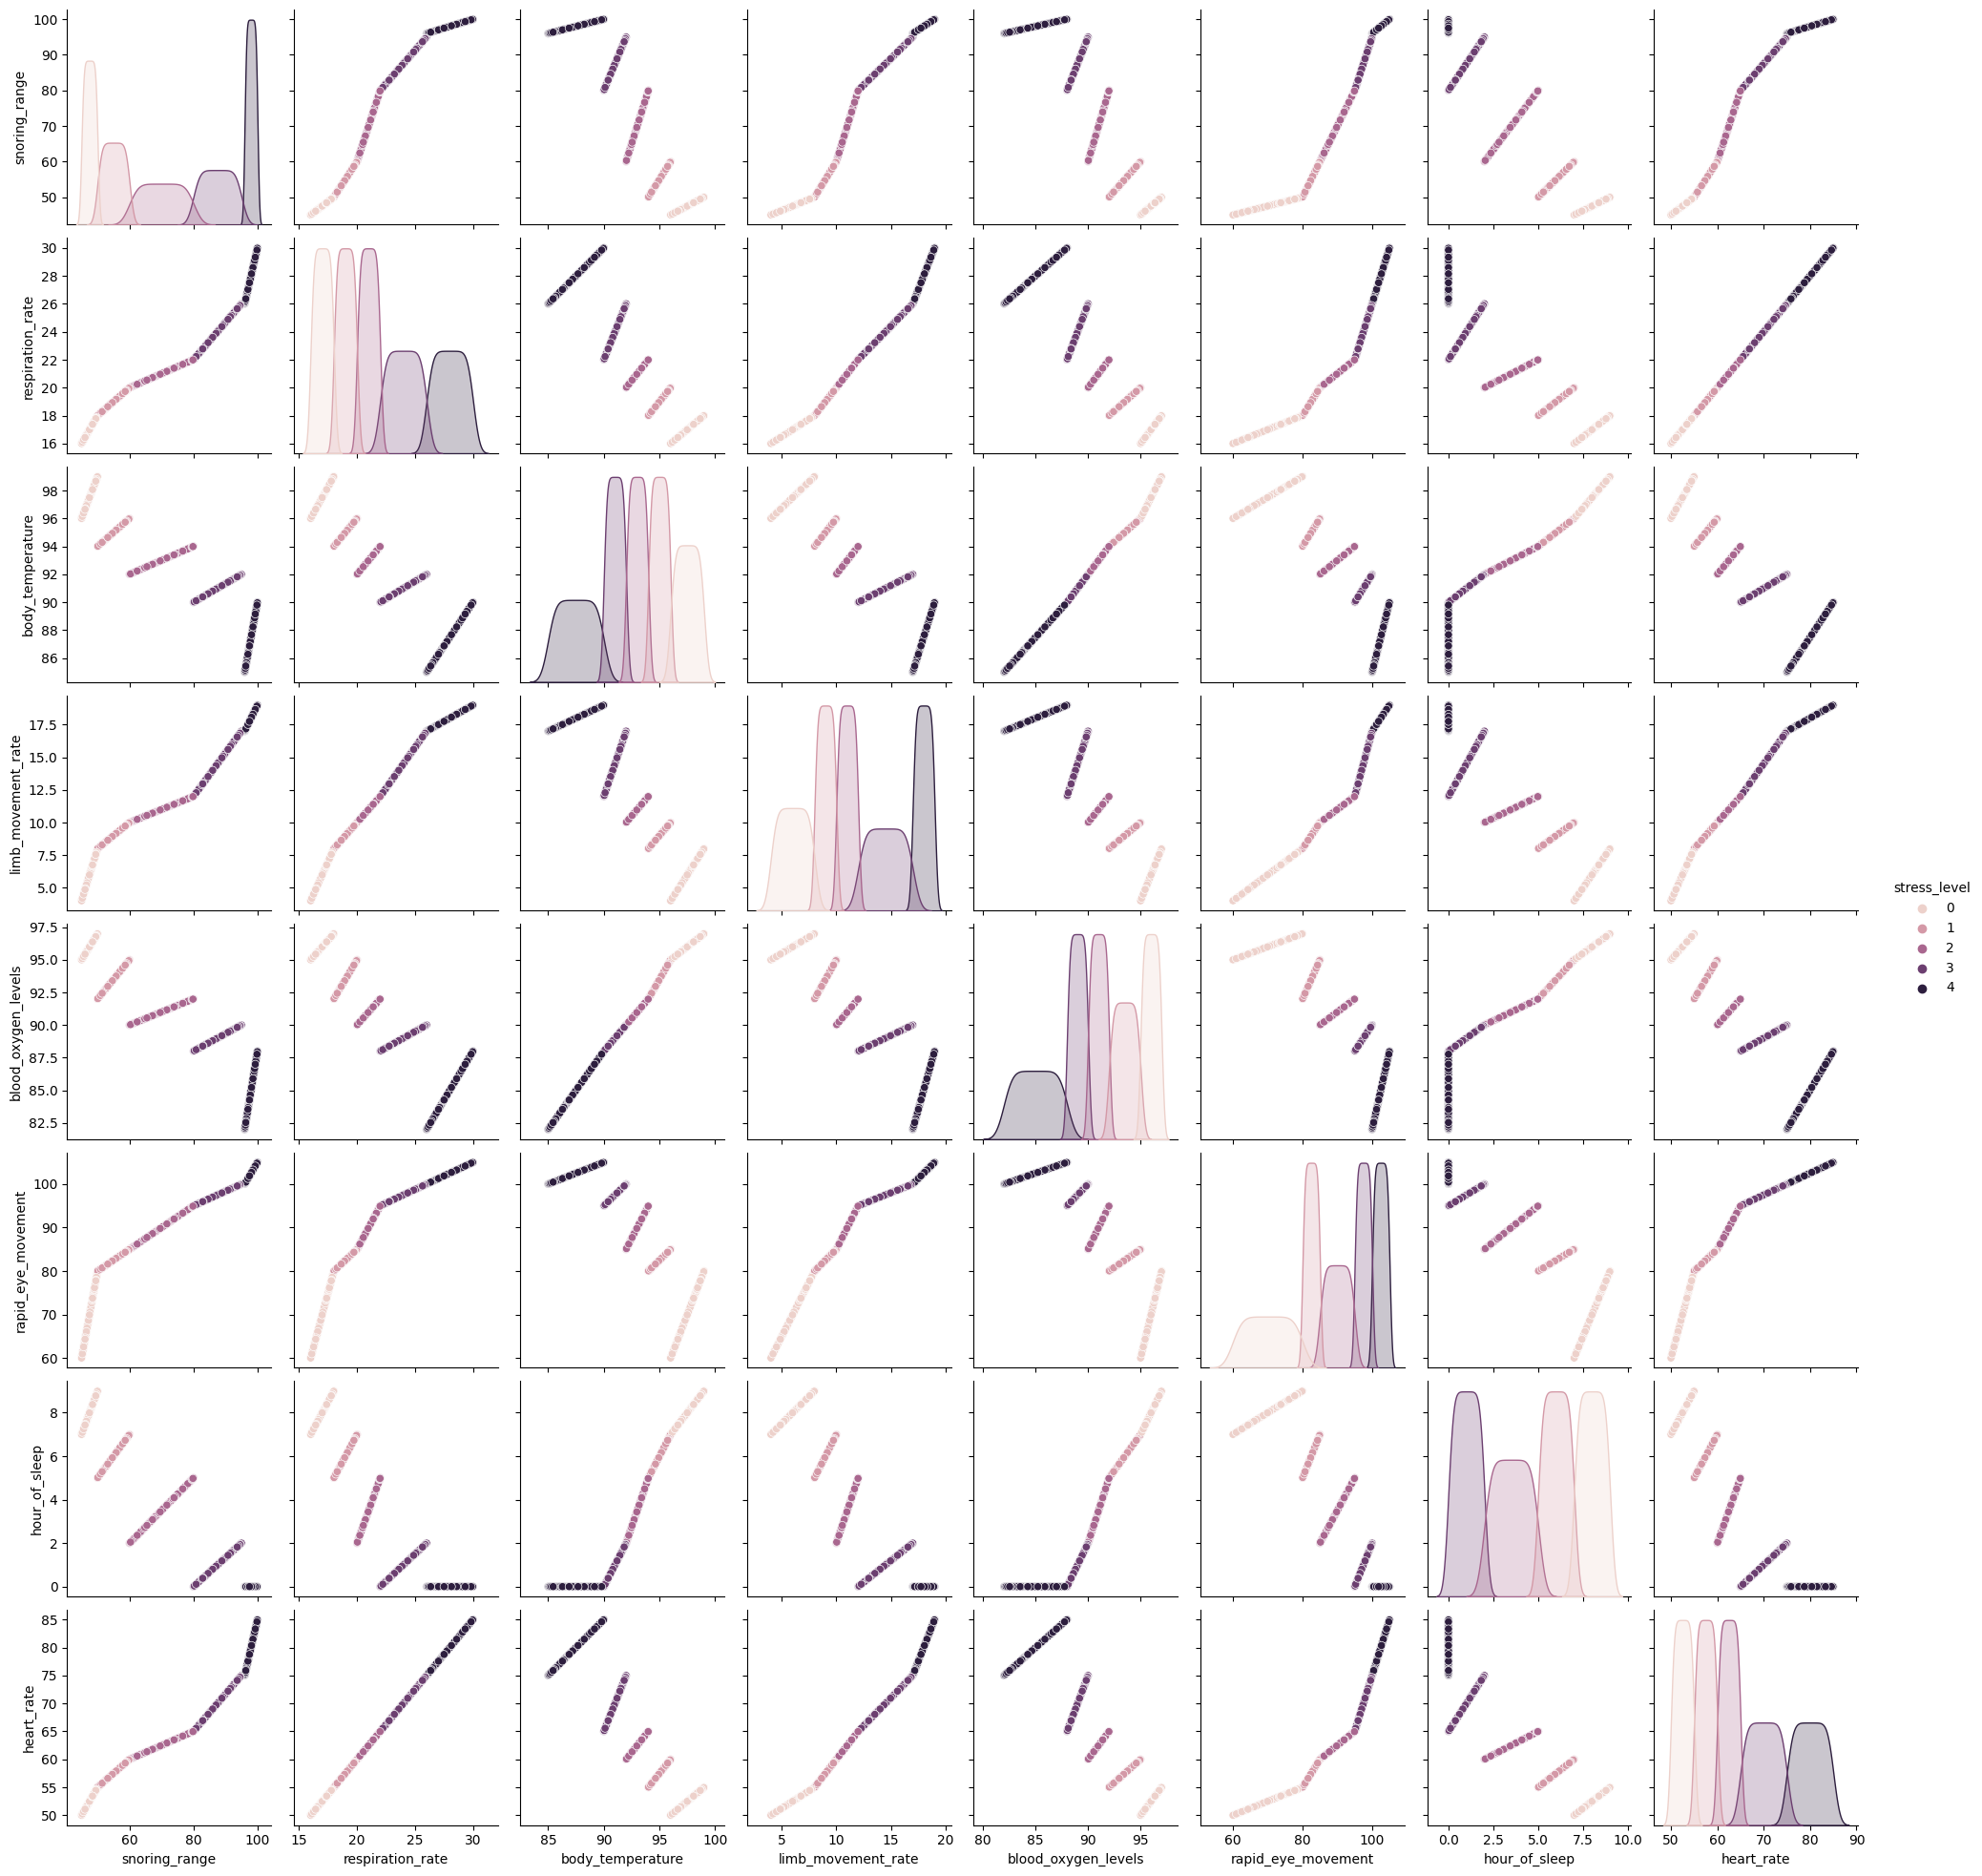

In [ ]:
sns.pairplot(data,hue="stress_level")

In [ ]:
"correlation"
data.corr()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
snoring_range,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
respiration_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
body_temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
limb_movement_rate,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
blood_oxygen_levels,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
rapid_eye_movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
hour_of_sleep,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
heart_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
stress_level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


<Axes: >

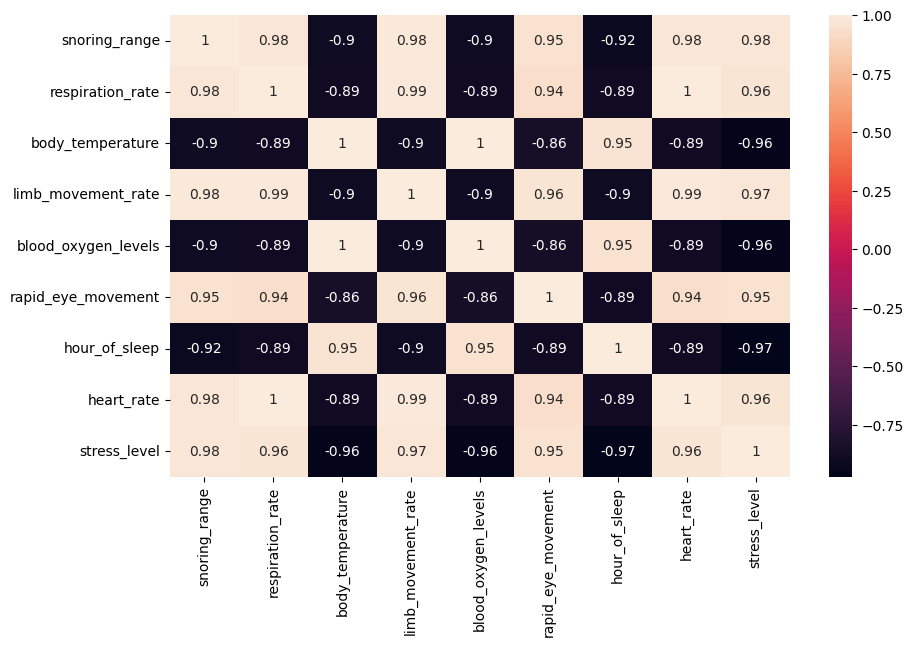

In [ ]:
"lets vizualize the correlation"
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data.corr(), ax=ax, annot=True)

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=0)
print(train.head())

     snoring_range  respiration_rate  body_temperature  limb_movement_rate  \
462         99.712            29.712            89.640              18.856   
468         76.320            21.632            93.632              11.632   
15          52.320            18.464            94.464               8.464   
6           47.000            16.800            97.200               5.600   
187         73.760            21.376            93.376              11.376   

     blood_oxygen_levels  rapid_eye_movement  hour_of_sleep  heart_rate  \
462               87.568              104.64          0.000       84.28   
468               91.632               93.16          4.448       64.08   
15                92.696               81.16          5.464       56.16   
6                 95.800               68.00          7.800       52.00   
187               91.376               91.88          4.064       63.44   

     stress_level  
462             4  
468             2  
15              1  


In [ ]:
scaler = MinMaxScaler()

scaled = scaler.fit_transform(data)

print(scaled)

[[0.88727273 0.69142857 0.48857143 ... 0.20444444 0.69142857 0.75      ]
 [0.848      0.65028571 0.468      ... 0.17244444 0.65028571 0.75      ]
 [0.27272727 0.28571429 0.78571429 ... 0.77777778 0.28571429 0.25      ]
 ...
 [0.95461818 0.82171429 0.13428571 ... 0.         0.82171429 1.        ]
 [0.248      0.26628571 0.76628571 ... 0.74755556 0.26628571 0.25      ]
 [0.52581818 0.38514286 0.59942857 ... 0.45422222 0.38514286 0.5       ]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier object with the desired value of K (number of neighbors)
knn = KNeighborsClassifier(n_neighbors=5)

# Separate the features and target variable
X = data.drop("stress_level", axis=1)
y = data["stress_level"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define a range of values for k
k_values = range(1, 31)

# Define an empty list to store the cross-validation scores for each value of k
cv_scores = []

# Loop over the range of k values
for k in k_values:
    # Instantiate the KNeighborsClassifier object with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Compute the cross-validation score for the KNN model with the current value of k
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    # Append the average score to the list of cross-validation scores
    cv_scores.append(scores.mean())

# Find the value of k that maximizes the cross-validation score
best_k = k_values[cv_scores.index(max(cv_scores))]
print("Best value of k:", best_k)


Best value of k: 1


In [ ]:
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predict the classes of the testing data using the trained KNN model
y_pred = knn.predict(X_test)

# Compute the classification metrics for the KNN model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test), average='macro', multi_class='ovo')

# Print the classification metrics for the KNN model
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC score: 1.0


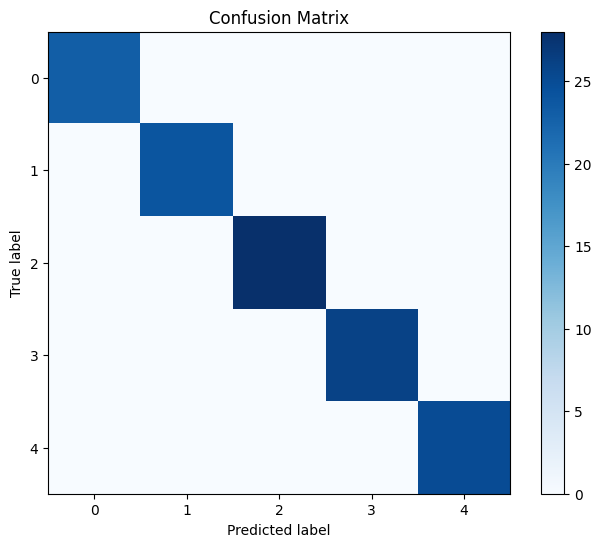

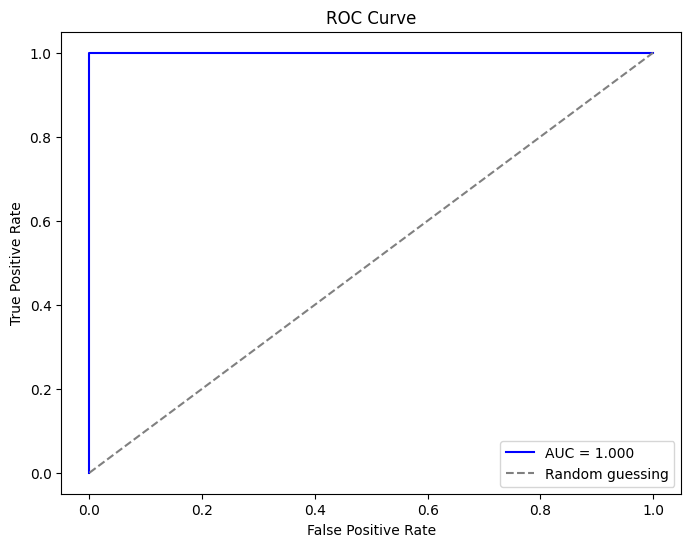

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Compute the confusion matrix for the KNN model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(ticks=range(5), labels=['0', '1', '2', '3', '4'])
plt.yticks(ticks=range(5), labels=['0', '1', '2', '3', '4'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Compute the ROC curve and ROC-AUC score for the KNN model
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test), average='macro', multi_class='ovo')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


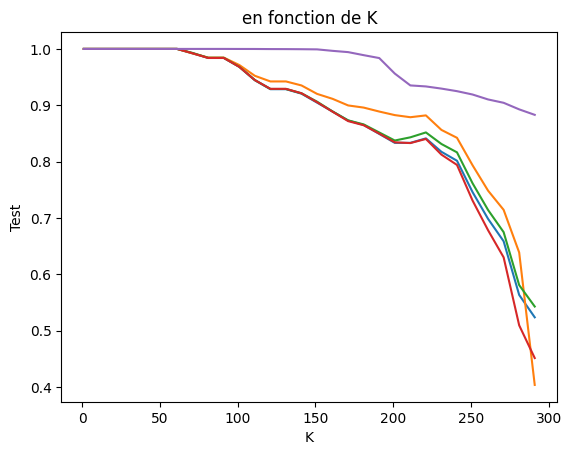

In [ ]:
# Test different values of K
k_values = range(1, 301, 10)
test_accuracies = []
test_precision = []
test_recall = []
test_f1 = []
test_roc = []

for k in k_values:
    # Train the KNN model on the training dataset
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluate the performance of the KNN model on the test dataset
    y_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_pre = precision_score(y_test, y_pred, average = 'macro')
    test_rec = recall_score(y_test, y_pred, average = 'macro')
    test_f1_ = f1_score(y_test, y_pred, average = 'macro')
    test_roc_ = roc_auc_score(y_test, knn.predict_proba(X_test), average='macro', multi_class='ovo')


    test_accuracies.append(test_accuracy)
    test_precision.append(test_pre)
    test_recall.append(test_rec)
    test_f1.append(test_f1_)
    test_roc.append(test_roc_)


# Plot the test accuracies for different values of K
plt.plot(k_values, test_accuracies)
plt.plot(k_values, test_precision)
plt.plot(k_values, test_recall)
plt.plot(k_values, test_f1)
plt.plot(k_values, test_roc)

plt.xlabel('K')
plt.ylabel('Test')
plt.title('en fonction de K')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a decision tree model on the training data
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Predict the classes of the testing data using the trained decision tree model
y_pred = dt.predict(X_test)

# Compute the classification metrics for the decision tree model
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred, average='macro')
recall2 = recall_score(y_test, y_pred, average='macro')
f12 = f1_score(y_test, y_pred, average='macro')
roc_auc2 = roc_auc_score(y_test, dt.predict_proba(X_test), average='macro', multi_class='ovo')

# Print the classification metrics for the decision tree model
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)
print("ROC-AUC score:", roc_auc2)


Accuracy: 0.9841269841269841
Precision: 0.9839743589743589
Recall: 0.9839743589743591
F1-score: 0.9836462244472257
ROC-AUC score: 0.9899839743589745


In [ ]:
from sklearn.model_selection import cross_val_score

# Define the range of k values to try
k_range = range(1, 31)

# Create an empty list to store the mean accuracy scores for each value of k
k_scores = []

# Perform 10-fold cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Find the value of k with the highest mean accuracy score
best_k = k_range[k_scores.index(max(k_scores))]

print("Best value of k:", best_k)


Best value of k: 1


In [ ]:
# Create a Decision Tree model
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree model
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
parameters = {'max_depth': [1, 2, 3, 4, 5]}

# Perform a grid search over the hyperparameters using cross-validation
clf = GridSearchCV(dt, parameters, cv=5)
clf.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best hyperparameters:", clf.best_params_)
print("Cross-validation score:", clf.best_score_)


Best hyperparameters: {'max_depth': 4}
Cross-validation score: 0.988059405940594


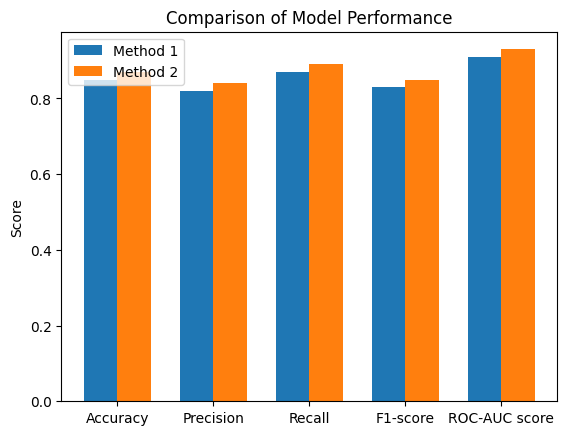

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Define the methods and their scores
methods = ["Method 1", "Method 2"]
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC score"]
scores = np.array([[0.85, 0.82, 0.87, 0.83, 0.91], [0.87, 0.84, 0.89, 0.85, 0.93]])

# Create a grouped bar chart
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores[0], width, label=methods[0])
rects2 = ax.bar(x + width/2, scores[1], width, label=methods[1])

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')

# Add legend and show plot
ax.legend()
plt.show()


In [ ]:
"""On choisit la deuxième méthode qui est le decision tree model training. En effet,tous les metrics sont meilleurs dans ce cas là """